<a href="https://www.kaggle.com/code/elmatroryas/titanic-pred?scriptVersionId=233535124" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plot dyal les graphes statistique 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exemple/exemple1.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/exemple2/exemple11.csv
/kaggle/input/mehdie/exemple122.csv


In [2]:
train= pd.read_csv('../input/titanic/train.csv')
X_test= pd.read_csv('../input/titanic/test.csv')
Y_test= pd.read_csv('../input/titanic/gender_submission.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Y_test =Y_test.drop(['PassengerId'],axis= 1, errors='ignore')
test= pd.concat([X_test,Y_test], axis=1)
print('forma: {}' .format(train.shape))
print('froma: {}' .format(test.shape))


forma: (891, 12)
froma: (418, 12)


In [4]:
print(train.count())
print(test.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
Survived       418
dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

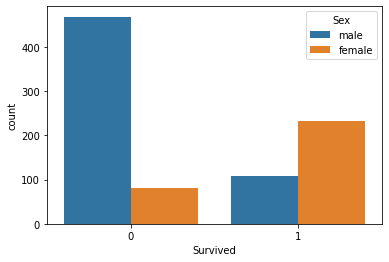

In [5]:
sns.countplot(x='Survived', hue='Sex', data=train)


<AxesSubplot:xlabel='Survived', ylabel='count'>

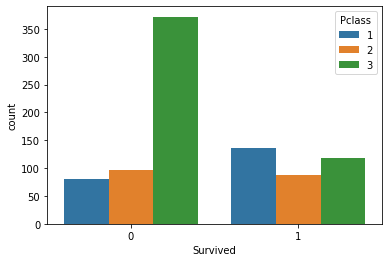

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=train)

In [7]:
train = train.drop(['PassengerId','Name', 'Cabin','Ticket'], axis=1 , errors='ignore')
test = test.drop(['PassengerId','Name', 'Cabin','Ticket'], axis=1 , errors='ignore')
print("age:",train["Age"].mean())
train["Age"][train["Age"].isna()] = train["Age"].mean()
test["Age"][test["Age"].isna()] = test["Age"].mean()

train.dropna(inplace= True)
test.dropna(inplace= True)

train.head()


age: 29.69911764705882


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# SPLITING SEX TO ( female = 0 , male = 1)
train["Sex"]=pd.get_dummies(train['Sex'],drop_first=True)
test["Sex"]=pd.get_dummies(test['Sex'],drop_first=True)
# renmae l sex to male
train.rename(columns={"Sex": "Male"}, inplace=True)
test.rename(columns={"Sex": "Male"}, inplace=True)
# Splitting embarked to 3 columns

emb_train=pd.get_dummies(train["Embarked"])
emb_test=pd.get_dummies(test["Embarked"]) 

train = pd.concat([train,emb_train],axis=1)
test = pd.concat([test,emb_test],axis=1)

train=train.drop(['Embarked'],axis=1,errors='ignore')
test=test.drop(['Embarked'],axis=1,errors='ignore')



In [9]:
Y_train = train["Survived"]
X_train=train.drop(['Survived'],axis=1,errors='ignore')

Y_test = test["Survived"]
X_test=test.drop(['Survived'],axis=1,errors='ignore')

In [10]:
print(X_train)
print(X_train.count())
print('Y:',Y_train.count())

     Pclass  Male        Age  SibSp  Parch     Fare  C  Q  S
0         3     1  22.000000      1      0   7.2500  0  0  1
1         1     0  38.000000      1      0  71.2833  1  0  0
2         3     0  26.000000      0      0   7.9250  0  0  1
3         1     0  35.000000      1      0  53.1000  0  0  1
4         3     1  35.000000      0      0   8.0500  0  0  1
..      ...   ...        ...    ...    ...      ... .. .. ..
886       2     1  27.000000      0      0  13.0000  0  0  1
887       1     0  19.000000      0      0  30.0000  0  0  1
888       3     0  29.699118      1      2  23.4500  0  0  1
889       1     1  26.000000      0      0  30.0000  1  0  0
890       3     1  32.000000      0      0   7.7500  0  1  0

[889 rows x 9 columns]
Pclass    889
Male      889
Age       889
SibSp     889
Parch     889
Fare      889
C         889
Q         889
S         889
dtype: int64
Y: 889


In [11]:
print(Y_train)
print(Y_train.count())
#print('Y:',Y_train.count())

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64
889


In [12]:
print(X_test)
print(X_test.count())
print('Y:',Y_test.count())

     Pclass  Male       Age  SibSp  Parch      Fare  C  Q  S
0         3     1  34.50000      0      0    7.8292  0  1  0
1         3     0  47.00000      1      0    7.0000  0  0  1
2         2     1  62.00000      0      0    9.6875  0  1  0
3         3     1  27.00000      0      0    8.6625  0  0  1
4         3     0  22.00000      1      1   12.2875  0  0  1
..      ...   ...       ...    ...    ...       ... .. .. ..
413       3     1  30.27259      0      0    8.0500  0  0  1
414       1     0  39.00000      0      0  108.9000  1  0  0
415       3     1  38.50000      0      0    7.2500  0  0  1
416       3     1  30.27259      0      0    8.0500  0  0  1
417       3     1  30.27259      1      1   22.3583  1  0  0

[417 rows x 9 columns]
Pclass    417
Male      417
Age       417
SibSp     417
Parch     417
Fare      417
C         417
Q         417
S         417
dtype: int64
Y: 417


In [13]:
from sklearn.linear_model import LogisticRegression


LogReg = LogisticRegression()

LogReg.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [14]:
predictions = LogReg.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [15]:
Y_test.head()
print(Y_test[2])

0


In [16]:

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       265
           1       0.90      0.91      0.91       152

    accuracy                           0.93       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.93      0.93      0.93       417



In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)

array([[250,  15],
       [ 13, 139]])

In [18]:
exe = pd.read_csv("../input/exemple/exemple1.csv")
fexe = LogReg.predict(exe)
fexe

array([1])

In [19]:
exe1 = pd.read_csv("../input/exemple2/exemple11.csv")
fexe1 = LogReg.predict(exe1)
fexe1

array([0])

In [20]:
exe2 = pd.read_csv("../input/mehdie/exemple122.csv") 
fexe2 = LogReg.predict(exe2)
fexe2

array([0])